In [1]:
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder \
    .appName("Gender Pay Gap Analysis") \
    .getOrCreate()

# Load the data using Spark
pay_gap_spark = spark.read.csv('pay_gap_Europe.csv', header=True, inferSchema=True)

# Display first few rows of the dataset
pay_gap_spark.toPandas()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/09 02:17:41 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


,Country,Year,GDP,Urban_population,Industry,Business,Mining,Manufacturing,Electricity_supply,Water_supply,...,Information,Financial,Real estate,Professional_scientific,Administrative,Public_administration,Education,Human_health,Arts,Other
0,Austria,2010,35390,57.40,24.0,25.2,18.3,24.4,23.6,12.2,...,21.2,30.3,27.0,34.0,22.5,NaN,27.8,12.0,34.0,32.0
1,Austria,2011,36300,57.12,23.5,24.7,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Austria,2012,36390,57.15,22.9,24.3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Austria,2013,36180,57.34,22.3,23.8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Austria,2014,36130,57.53,22.2,23.8,15.9,23.0,19.8,10.0,...,22.9,30.4,27.8,31.5,19.5,NaN,24.3,12.8,26.6,28.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,Switzerland,2017,60420,73.76,17.6,19.6,8.1,17.1,11.4,3.1,...,22.3,31.1,22.1,23.5,18.2,16.4,10.6,17.1,15.4,15.8
320,Switzerland,2018,61690,73.80,18.6,20.3,9.4,17.3,12.8,4.5,...,24.6,33.1,22.6,25.7,18.2,17.8,13.3,18.1,14.4,18.0
321,Switzerland,2019,61950,73.85,18.6,20.2,9.3,16.4,12.7,4.4,...,24.6,33.1,22.6,26.5,18.1,17.8,13.3,17.1,16.1,19.6
322,Switzerland,2020,60040,73.92,18.4,20.1,7.5,16.9,11.0,2.5,...,22.1,33.6,22.6,27.2,17.9,18.2,13.3,18.8,11.8,15.5


View the statistical description of the data

In [2]:
pay_gap_spark.describe().toPandas()

,summary,Country,Year,GDP,Urban_population,Industry,Business,Mining,Manufacturing,Electricity_supply,...,Information,Financial,Real estate,Professional_scientific,Administrative,Public_administration,Education,Human_health,Arts,Other
0,count,324,324,324,324,321,320,303,318,301,...,315,318,311,318,315,258,315,318,311,313
1,mean,None,2015.5,28012.438271604937,73.45774691358022,13.861993769470404,16.610312499999992,9.529372937293733,19.256603773584903,11.511960132890367,...,19.220952380952404,27.93836477987423,13.261736334405152,19.12610062893081,8.11619047619047,9.401162790697674,11.268888888888888,18.49905660377359,17.49517684887461,17.111501597444104
2,stddev,None,3.457392134473197,19047.04652545709,12.746677689559252,5.849507544440049,4.841518443884779,13.347297836613416,6.655568843543944,7.183494261968797,...,6.266796973974171,7.2581667153909235,10.669609338069993,7.519625922969014,11.104008490162038,6.180844530449123,6.2006818792669725,8.256657712630256,12.681882271669872,10.340968838558089
3,min,Austria,2010,5080,52.66,-0.2,5.4,-26.6,1.7,-2.0,...,7.3,4.9,-47.9,-1.8,-33.2,-5.5,-3.0,-6.8,-16.8,-11.9
4,max,Switzerland,2021,84750,98.12,29.9,30.2,43.7,33.6,49.2,...,33.4,45.1,44.8,36.2,27.7,23.3,36.0,37.6,68.6,48.1


Calculate the number of missing values for each column

In [3]:
from pyspark.sql.functions import when, count, col

missing_data = pay_gap_spark.select([count(when(col(c).isNull(), c)).alias(c) for c in pay_gap_spark.columns])
missing_data.toPandas()

,Country,Year,GDP,Urban_population,Industry,Business,Mining,Manufacturing,Electricity_supply,Water_supply,...,Information,Financial,Real estate,Professional_scientific,Administrative,Public_administration,Education,Human_health,Arts,Other
0,0,0,0,0,3,4,21,6,23,12,...,9,6,13,6,9,66,9,6,13,11


Check duplicate rows

In [4]:
duplicates_count = pay_gap_spark.count() - pay_gap_spark.distinct().count()
print(f"Duplicate Rows Count: {duplicates_count}")

Duplicate Rows Count: 0


Outliers were detected using the interquartile (IQR) method

In [5]:
import pandas as pd

# Exclude the columns 'Country' and 'Year'
numeric_columns = [col for col in pay_gap_spark.columns if col not in ['Country', 'Year']]

# Use PySpark to obtain quartiles
quantiles = pay_gap_spark.approxQuantile(numeric_columns, [0.25, 0.75], 0.05)

# Use Pandas to calculate IQR and detect outliers
pay_gap_pd = pay_gap_spark.toPandas()
Q1 = pay_gap_pd[numeric_columns].quantile(0.25)
Q3 = pay_gap_pd[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((pay_gap_pd[numeric_columns] < (Q1 - 1.5 * IQR)) | (pay_gap_pd[numeric_columns] > (Q3 + 1.5 * IQR))).sum()
print("\nOutliers Count:")
print(outliers)


Outliers Count:
GDP                        12
Urban_population            0
Industry                    1
Business                    2
Mining                     14
Manufacturing               0
Electricity_supply          1
Water_supply                8
Construction                0
Retail trade                6
Transportation             27
Accommodation               8
Information                 0
Financial                   6
Real estate                14
Professional_scientific    10
Administrative             31
Public_administration       0
Education                   2
Human_health                2
Arts                       29
Other                       7
dtype: int64


Calculate the number of records per year

In [6]:
yearly_record_count = pay_gap_spark.groupBy('Year').count()
yearly_record_count.show()

+----+-----+
|Year|count|
+----+-----+
|2018|   27|
|2015|   27|
|2013|   27|
|2014|   27|
|2019|   27|
|2020|   27|
|2012|   27|
|2016|   27|
|2010|   27|
|2011|   27|
|2017|   27|
|2021|   27|
+----+-----+



Calculate the percentage of missing data for each year

In [7]:
yearly_data = pay_gap_spark.groupBy('Year').agg(*[(1 - (count(c) / count('*'))).alias(c + '_missing') for c in pay_gap_spark.columns if c != 'Year'])
yearly_missing_data = yearly_data.toPandas().set_index('Year')
print(yearly_missing_data)

      Country_missing  GDP_missing  Urban_population_missing  \
Year                                                           
2018              0.0          0.0                       0.0   
2015              0.0          0.0                       0.0   
2013              0.0          0.0                       0.0   
2014              0.0          0.0                       0.0   
2019              0.0          0.0                       0.0   
2020              0.0          0.0                       0.0   
2012              0.0          0.0                       0.0   
2016              0.0          0.0                       0.0   
2010              0.0          0.0                       0.0   
2011              0.0          0.0                       0.0   
2017              0.0          0.0                       0.0   
2021              0.0          0.0                       0.0   

      Industry_missing  Business_missing  Mining_missing  \
Year                                       

In [8]:
def quality_check_table(df_spark, df_pd, outliers):
    data = []
    for col_name in df_spark.columns:
        valid = df_spark.filter(df_spark[col_name].isNotNull()).count()
        null = df_spark.filter(df_spark[col_name].isNull()).count()
        empty_string = df_spark.filter(df_spark[col_name] == "").count()
        white_space = df_spark.filter(df_spark[col_name] == " ").count()
        blank_value = empty_string + white_space
        outliers_count = outliers.get(col_name, 0)  # 使用 get 方法来处理 outliers 中可能不存在的列
        extremes_count = outliers_count  # 这是一个简化；实际方法可能有所不同
        data.append([col_name, f"{valid / df_spark.count() * 100:.2f}%", valid, null, empty_string, white_space, blank_value, outliers_count, extremes_count])
    
    columns = ["Field", "%Complete", "Valid Records", "Null Values", "Empty String", "White Space", "Blank Value", "Outliers", "Extremes"]
    quality_df = pd.DataFrame(data, columns=columns)

    return quality_df

quality_df = quality_check_table(pay_gap_spark, pay_gap_pd, outliers)
print(quality_df)

                      Field %Complete  Valid Records  Null Values  \
0                   Country   100.00%            324            0   
1                      Year   100.00%            324            0   
2                       GDP   100.00%            324            0   
3          Urban_population   100.00%            324            0   
4                  Industry    99.07%            321            3   
5                  Business    98.77%            320            4   
6                    Mining    93.52%            303           21   
7             Manufacturing    98.15%            318            6   
8        Electricity_supply    92.90%            301           23   
9              Water_supply    96.30%            312           12   
10             Construction    96.30%            312           12   
11             Retail trade    97.84%            317            7   
12           Transportation    98.15%            318            6   
13            Accommodation    97.

Split data by year 2021

In [9]:
pay_gap_2021_spark = pay_gap_spark.filter(pay_gap_spark['Year'] == 2021)
pay_gap_2021_spark.toPandas()

,Country,Year,GDP,Urban_population,Industry,Business,Mining,Manufacturing,Electricity_supply,Water_supply,...,Information,Financial,Real estate,Professional_scientific,Administrative,Public_administration,Education,Human_health,Arts,Other
0,Austria,2021,36950,59.00,18.8,20.7,6.9,20.2,12.5,7.2,...,19.7,27.2,27.0,25.8,16.9,NaN,22.6,13.6,15.8,24.5
1,Belgium,2021,35950,98.12,5.0,9.2,-4.1,9.5,6.1,11.2,...,11.2,7.0,9.1,4.8,8.0,NaN,4.9,2.1,-0.2,3.3
2,Bulgaria,2021,6950,76.03,12.2,14.5,13.6,22.2,7.7,8.0,...,22.1,33.5,-7.2,15.4,-22.1,11.3,9.1,26.4,22.2,-1.9
3,Croatia,2021,13500,57.88,11.1,12.6,5.0,23.6,0.6,-2.1,...,13.4,23.5,1.7,15.0,7.3,11.7,15.0,17.6,16.3,33.0
4,Cyprus,2021,25480,66.86,9.7,16.8,34.3,22.8,-0.4,-18.3,...,15.9,20.1,-41.2,28.8,5.0,14.0,18.2,19.5,39.4,27.8
5,Czech Republic,2021,18020,74.21,15.0,12.4,12.7,23.1,17.2,3.8,...,28.9,37.5,9.0,21.3,12.3,15.2,18.4,20.6,13.0,12.8
6,Denmark,2021,50010,88.24,14.2,14.0,13.0,8.5,15.5,2.6,...,16.1,16.4,8.6,17.1,-0.5,6.1,5.6,8.0,9.6,8.7
7,Estonia,2021,16490,69.42,20.5,22.3,16.4,23.4,9.8,10.1,...,23.3,31.0,17.6,15.4,18.9,7.1,17.5,25.1,16.1,12.5
8,Finland,2021,37250,85.60,16.5,15.9,13.0,9.5,17.2,3.2,...,11.4,26.4,18.7,14.9,10.7,13.2,12.1,19.6,10.2,15.1
9,France,2021,32530,81.24,15.4,12.8,16.1,13.1,8.7,-2.8,...,14.3,31.0,13.8,21.8,5.0,11.6,15.9,17.3,22.9,8.0


View missing values for 2021 data

In [10]:
missing_data_2021 = pay_gap_2021_spark.select([count(when(col(c).isNull(), c)).alias(c) for c in pay_gap_2021_spark.columns])
missing_data_2021.toPandas()

,Country,Year,GDP,Urban_population,Industry,Business,Mining,Manufacturing,Electricity_supply,Water_supply,...,Information,Financial,Real estate,Professional_scientific,Administrative,Public_administration,Education,Human_health,Arts,Other
0,0,0,0,0,0,0,1,0,2,0,...,0,0,0,0,0,4,0,0,0,0


Handle missing values and outliers

In [11]:
# Null values imputation
from pyspark.sql.functions import mean

# Use a simple imputation method
for col_name in numeric_columns:
    mean_value = pay_gap_2021_spark.agg(mean(col_name)).first()[0]
    pay_gap_2021_spark = pay_gap_2021_spark.na.fill({col_name: mean_value})

# Remove the year column
pay_gap_2021_spark = pay_gap_2021_spark.drop('Year')

PCA analysis process (PySpark and sklearn combined)

1. Data preprocessing (vectorization and normalization) using PySpark.
2. Principal component analysis was performed using sklearn's PCA method.
3. Factor analysis using factor_analyzer.

In [12]:
from pyspark.ml.feature import VectorAssembler, StandardScaler
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer

# 1. Data Preprocessing using PySpark
# Vectorize the columns
vector_assembler = VectorAssembler(inputCols=numeric_columns, outputCol="features")
pay_gap_2021_vectorized = vector_assembler.transform(pay_gap_2021_spark)

# Convert the Spark DataFrame to Pandas for further operations
pay_gap_2021_pd = pay_gap_2021_vectorized.toPandas()

# Extract numerical columns
X = pay_gap_2021_pd[numeric_columns]

# Normalize the features
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)

# 2. Principal Component Analysis using scikit-learn
pca = PCA()
X_pca = pca.fit_transform(X_norm)

# Convert to dataframe
names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca_df = pd.DataFrame(X_pca, columns=names)

# 3. Factor Analysis
fa = FactorAnalyzer(rotation="varimax", n_factors=6, method='principal')
fa.fit(X_norm)

# Get the rotated factor pattern
loadings = pd.DataFrame(fa.loadings_, index=X_norm.columns, columns=[f"Factor{i+1}" for i in range(6)])
rotated_factor_pattern = loadings[abs(loadings) >= 0.4].dropna(how='all')

rotated_factor_pattern

23/10/09 02:18:16 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
GDP,-0.502641,NaN,NaN,NaN,-0.616858,NaN
Urban_population,-0.630608,NaN,NaN,NaN,NaN,NaN
Industry,NaN,0.699268,NaN,NaN,NaN,NaN
Business,NaN,0.583081,NaN,NaN,NaN,NaN
Mining,NaN,NaN,0.833200,NaN,NaN,NaN
Manufacturing,0.675007,NaN,NaN,NaN,0.568468,NaN
Electricity_supply,NaN,0.828761,NaN,NaN,NaN,NaN
Water_supply,NaN,0.578545,NaN,0.624657,NaN,NaN
Construction,NaN,0.779916,NaN,NaN,NaN,NaN
Retail trade,0.627668,NaN,0.433814,NaN,NaN,0.409284


Factor 1 is determined by GDP per capita, Urban population(%), Manufacturing, Retail trade, Information and Financial pay gaps (Urban & Service Pay Gap) Factor 2 is determined by pay gaps in Industry, Business, Electricity Supply, Construction, and Real Estate (Industry & Business Pay Gap) Factor 3 is determined by pay gaps in Mining and Accommodation (Resource Extraction Pay Gap) Factor 4 is determined by pay gaps Water Supply, Public Administration and other (Public Service Pay Gap) Factor 5 is determined by GDP per capita(euros) and pay gaps in Education, Human Health and Arts (Economic Development Pay Gap) Factor 6 is determined by pay gaps in Scientific Administrative areas (Science & Administration Pay Gap)

# Clustering

PySpark's MLlib provides KMeans clustering, but not hierarchical clustering or factor analysis. Therefore, we will use PySpark for data preprocessing and KMeans clustering, and then use Python's scipy and sklearn to complete hierarchical clustering and factor analysis.

Hierarchical clustering:
We must use the original Python code for this part because PySpark does not support hierarchical clustering.

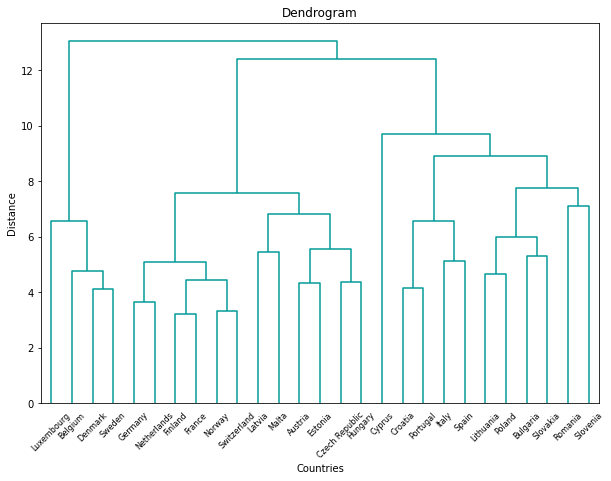

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform Ward hierarchical clustering
Z = linkage(X_norm, method='ward')

# Plot dendrogram to visualize hierarchical clustering
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=pay_gap_2021_pd['Country'].values, orientation='top', leaf_font_size=8,
           color_threshold=0, above_threshold_color='#009999')
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Distance')
plt.show()

Using KMeans to determine the optimal number of clusters:

/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

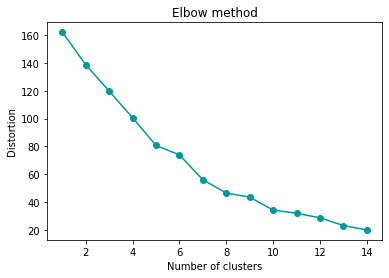

In [14]:
from sklearn.cluster import KMeans

# Extract factor scores for clustering
factor_scores = fa.transform(X_norm)

# Determine optimal number of clusters using the elbow method
distortions = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(factor_scores)
    distortions.append(kmeans.inertia_)

plt.plot(range(1, 15), distortions, marker='o', color='#009999')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()


We choose 8 as the cluster number

Using PySpark for KMeans clustering:


In [27]:
from pyspark.ml.clustering import KMeans as SparkKMeans

# Convert factor_scores to a Spark DataFrame with specified column names
column_names = ['Urban&Service', 'Industry&Business', 'Mining&Accommodation', 'Public Service', 'Economic Development', 'Science&Administration']
factor_scores_df = spark.createDataFrame(pd.DataFrame(factor_scores, index=X_norm.index, columns=column_names))

# Vectorize the columns
vector_assembler = VectorAssembler(inputCols=column_names, outputCol="features")
factor_scores_vectorized = vector_assembler.transform(factor_scores_df)

# Perform k-means clustering with PySpark
kmeans = SparkKMeans(k=8, seed=42, featuresCol="features")
kmeans_model = kmeans.fit(factor_scores_vectorized)
kmeans_predictions = kmeans_model.transform(factor_scores_vectorized)
print(factor_scores_df)

DataFrame[Urban&Service: double, Industry&Business: double, Mining&Accommodation: double, Public Service: double, Economic Development: double, Science&Administration: double]


Merge the clustering results with the raw data and output:


In [28]:
# Convert the clustering result to Pandas DataFrame
kmeans_predictions_pd = kmeans_predictions.select("prediction").toPandas()

# Ensure the index of kmeans_predictions_pd matches with pay_gap_2021_pd
kmeans_predictions_pd.index = pay_gap_2021_pd.index

# Add cluster labels to the original data
pay_gap_2021_pd['Cluster'] = kmeans_predictions_pd['prediction']

# Extract the desired columns: 'Country' and 'Cluster'
selected_columns = pay_gap_2021_pd[['Country', 'Cluster']]

# Display the result
print(selected_columns)

# Save the result to a CSV file
selected_columns.to_csv('cluster_countries.csv', index=False)

           Country  Cluster
0          Austria        7
1          Belgium        0
2         Bulgaria        2
3          Croatia        4
4           Cyprus        3
5   Czech Republic        5
6          Denmark        0
7          Estonia        5
8          Finland        7
9           France        7
10         Germany        1
11         Hungary        1
12           Italy        1
13          Latvia        6
14       Lithuania        6
15      Luxembourg        3
16           Malta        6
17     Netherlands        0
18          Norway        7
19          Poland        3
20        Portugal        4
21         Romania        2
22        Slovakia        5
23        Slovenia        3
24           Spain        4
25          Sweden        0
26     Switzerland        7


/tmp/ipykernel_1337/3223268417.py:15: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


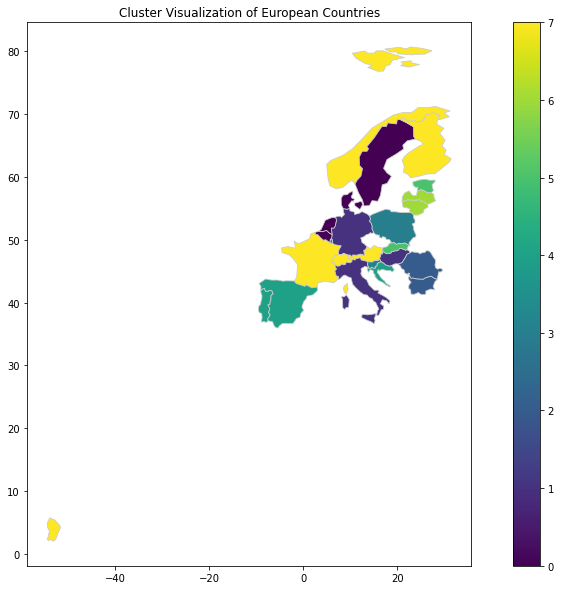

In [29]:
import geopandas as gpd


# Creating a dataframe from the given data
data = {
    'Country': ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 
                'Finland', 'France', 'Germany', 'Hungary', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 
                'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 
                'Switzerland'],
    'Cluster': [7, 0, 2, 4, 3, 5, 0, 5, 7, 7, 1, 1, 1, 6, 6, 3, 6, 0, 7, 3, 4, 2, 5, 3, 4, 0, 7]
}
df = pd.DataFrame(data)

# Load the Europe map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# We restrict to Europe.
world = world[(world.pop_est>0) & (world.name!="Antarctica") & (world.continent=="Europe")]

# Merge the world dataframe with our dataframe on country names
merged = world.set_index('name').join(df.set_index('Country'))

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='Cluster', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title("Cluster Visualization of European Countries")
plt.show()


# Spatial Regression

1. Data Import and Preparation:
This step involves importing the necessary datasets, merging them, and selecting the relevant columns.

In [37]:
# Importing required packages
import pysal
import folium
from sklearn.feature_selection import mutual_info_regression

import libpysal
from libpysal  import weights
import spreg
from spreg import OLS, ML_Lag, ML_Error
import esda
from esda.moran import Moran, Moran_Local
import splot
import numpy as np
import seaborn as sns


# Import other dataset and source
gii = pd.read_csv("Gender_Inequality_Index.csv")
json_df = gpd.read_file('worldcountries_geojson.geojson')
json_df.rename(columns={'ADMIN': 'Country'}, inplace=True)

# Convert factor_scores_df from PySpark DataFrame to pandas DataFrame
factor_scores_pd = factor_scores_df.toPandas()

# Replace columns in pay_gap_2021_clustered with columns from factor_scores_pd
for col in factor_scores_pd.columns:
    pay_gap_2021_clustered[col] = factor_scores_pd[col]

# Merge with json_df and gii
database = pd.merge(json_df, pay_gap_2021_clustered, on='Country')
database1 = pd.merge(database, gii[['Country','GII']], on='Country')

# Ensure the columns are correctly merged
selected_columns = database1[['GII', 'Urban&Service', 'Industry&Business', 'Mining&Accommodation', 'Public Service', 'Economic Development', 'Science&Administration', 'Cluster']]
selected_columns.to_csv('database1.csv', index=False)
print(selected_columns)

      GII  Urban&Service  Industry&Business  Mining&Accommodation  \
0   0.053       0.288008           1.224384             -0.366408   
1   0.048      -1.852952           0.312017             -0.626845   
2   0.210       0.486543           0.014297              0.768986   
3   0.018       0.241716           1.104738              0.473297   
4   0.123      -0.747380          -2.105415              3.129958   
5   0.073      -0.119680           1.430979              0.183473   
6   0.013      -1.173662           0.886642              0.866096   
7   0.057      -1.411643           0.607380             -1.940557   
8   0.100       1.514327           1.275864             -0.094287   
9   0.033      -0.637907           0.931837              0.183199   
10  0.083      -0.292019          -0.010421             -0.003125   
11  0.093      -0.010738          -1.637541             -0.318352   
12  0.221       0.496284           0.253456             -1.011918   
13  0.056      -1.291847          

2. Data Visualization:
Visualize the relationships between variables using scatter plots, histograms, boxplots, and geospatial plots.

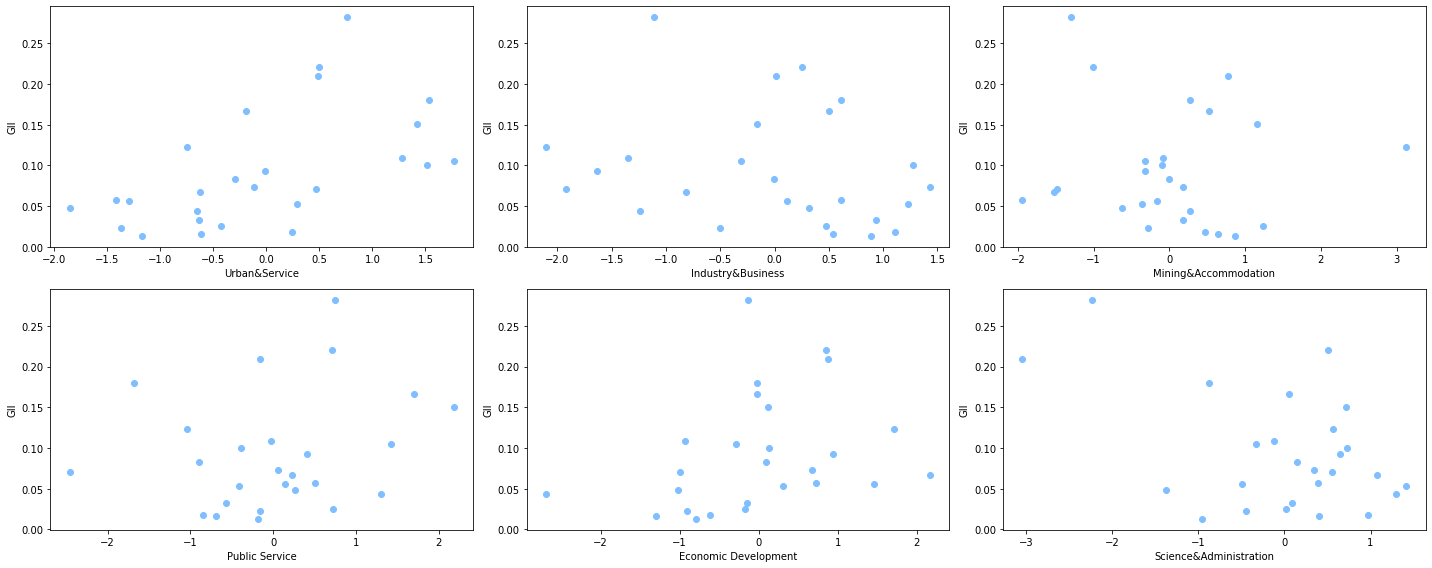

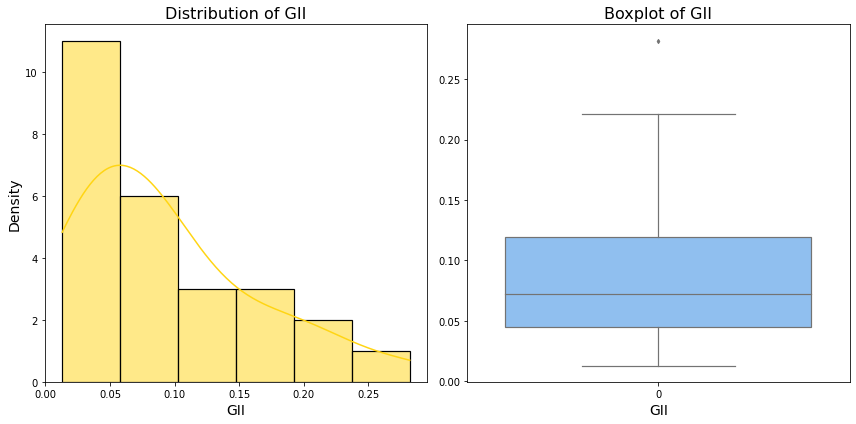

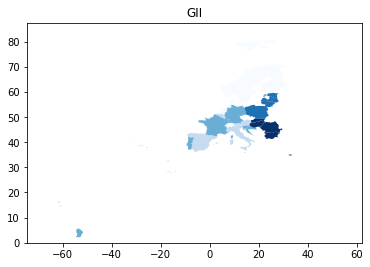

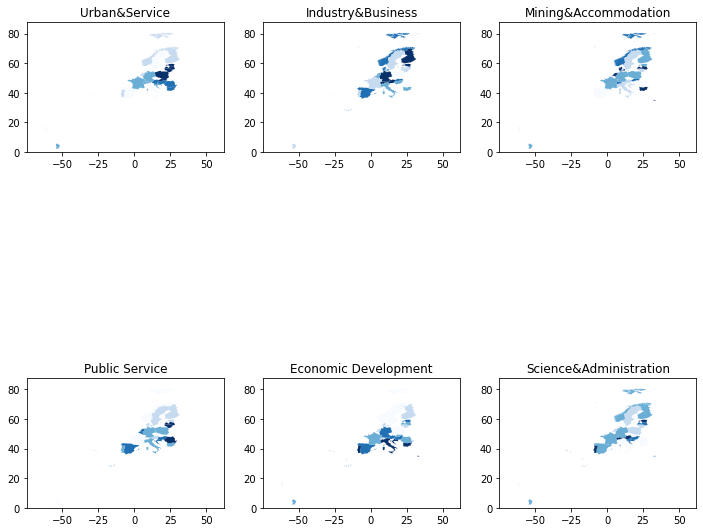

In [38]:
# Scatter plots of variables against GII
def scatter_plots_vs_GII(database1):
    y = database1['GII']
    database_ = database1[['Urban&Service','Industry&Business','Mining&Accommodation','Public Service','Economic Development','Science&Administration']]
    num_cols = [col for col in database_.columns]
    num_cols_len = len(num_cols)
    num_cols_per_row = 3
    num_rows = int(num_cols_len / num_cols_per_row) + (num_cols_len % num_cols_per_row > 0)
    fig, axs = plt.subplots(num_rows, num_cols_per_row, figsize=(20, 4*num_rows), gridspec_kw={'width_ratios': [1, 1, 1]})
    for idx, col in enumerate(num_cols):
        row_idx = int(idx / num_cols_per_row)
        col_idx = idx % num_cols_per_row
        if idx >= num_cols_len:
            axs[row_idx, col_idx].axis('off')
        else:
            axs[row_idx, col_idx].scatter(database_[col], y, color="#80bfff")
            axs[row_idx, col_idx].set_xlabel(col)
            axs[row_idx, col_idx].set_ylabel('GII')
    # Remove any empty subplots
    if num_cols_len % num_cols_per_row > 0:
        for i in range(num_cols_len % num_cols_per_row, num_cols_per_row):
            fig.delaxes(axs[num_rows-1, i])
    plt.tight_layout()
    plt.show()

scatter_plots_vs_GII(database1)

# Visualize the target variable 'GII'
def target_var_visualized(database1):
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    sns.histplot(data=database1['GII'], kde=True, color = "#ffd514", edgecolor='black', linewidth=1.2)
    plt.xlabel('GII', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.title('Distribution of GII', fontsize=16)
    plt.subplot(122)
    sns.boxplot(data=database1['GII'], color = "#80bfff", linewidth=1.2, fliersize=3)
    plt.xlabel('GII', fontsize=14)
    plt.title('Boxplot of GII', fontsize=16)
    plt.tight_layout()
    plt.show()

target_var_visualized(database1)

# Geospatial visualization of 'GII' and other variables
def geospatial_visualization(database1):
    cluster_variable = database1[['GII']]
    f, ax = plt.subplots(figsize=(6, 6))
    database1.plot(column=cluster_variable.iloc[:, 0], ax=ax, scheme="Quantiles", linewidth=0, cmap="Blues")
    ax.set_title(cluster_variable.columns[0])
    ax.set_ylim(bottom=0)
    plt.show()

    cluster_variables = database1[['Urban&Service','Industry&Business','Mining&Accommodation','Public Service','Economic Development','Science&Administration']]
    num_vars = len(cluster_variables)
    num_cols_per_row = 3
    num_rows = 2
    f, axs = plt.subplots(nrows=num_rows, ncols=num_cols_per_row, figsize=(12, 12))
    axs = axs.flatten()
    for i, col in enumerate(cluster_variables):
        ax = axs[i]
        database1.plot(column=col, ax=ax, scheme="Quantiles", linewidth=0, cmap="Blues")
        ax.set_title(col)
        ax.set_ylim(bottom=0)
    if i == num_vars - 1:
        num_cols_len = num_cols_per_row * num_rows
        if num_vars % num_cols_per_row > 0:
            for j in range(num_vars % num_cols_per_row, num_cols_per_row):
                f.delaxes(axs[num_rows-1, j])
    plt.show()

geospatial_visualization(database1)


3. Spatial Regression and Analysis:
This step involves creating spatial weights, performing OLS regression, lag models, error models, and visualizing results.

In [39]:
# Create Spatial weights matrix
W = weights.KNN.from_dataframe(database1, k=3)
W.transform = 'r'

# OLS regression
ols = OLS(y=database1['GII'].values, x=database1[['Urban&Service','Industry&Business','Mining&Accommodation','Public Service','Economic Development','Science&Administration']].values, w=W, name_y='GII', name_x=['Urban&Service','Industry&Business','Mining&Accommodation','Public Service','Economic Development','Science&Administration'], name_w='distance', name_ds='database', white_test=True, spat_diag=True, moran=True)
print(ols.summary)

# Lag model
y = database1['GII'].values
x = database1[['Urban&Service','Industry&Business','Mining&Accommodation','Public Service','Economic Development','Science&Administration']].values
lag = ML_Lag(y, x, w=W, name_y='GII', name_x=['Urban&Service','Industry&Business','Mining&Accommodation','Public Service','Economic Development','Science&Administration'])
print(lag.summary)

# Error model
y = database1['GII'].values
x = database1[['Urban&Service','Industry&Business','Mining&Accommodation','Public Service','Economic Development','Science&Administration']].values
err = ML_Error(y, x, w=W, name_y='GII', name_x=['Urban&Service','Industry&Business','Mining&Accommodation','Public Service','Economic Development','Science&Administration'])
print(err.summary)


REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :    database
Weights matrix      :    distance
Dependent Variable  :         GII                Number of Observations:          26
Mean dependent var  :      0.0931                Number of Variables   :           7
S.D. dependent var  :      0.0707                Degrees of Freedom    :          19
R-squared           :      0.6958
Adjusted R-squared  :      0.5997
Sum squared residual:   0.0380219                F-statistic           :      7.2424
Sigma-square        :       0.002                Prob(F-statistic)     :   0.0003909
S.E. of regression  :       0.045                Log likelihood        :      47.968
Sigma-square ML     :       0.001                Akaike info criterion :     -81.935
S.E of regression ML:      0.0382                Schwarz criterion     :     -73.128

------------------------------------------------------------

/home/ubuntu/.local/lib/python3.10/site-packages/scipy/optimize/_minimize.py:913: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


1. OLS Regression (Ordinary Least Squares)

The R^2 value is 0.6958, suggesting that about 69.58% of the variation in GII can be explained by the selected factors.
The variables Urban&Service, Economic Development, and Science&Administration have p-values significantly less than 0.05, indicating they are significantly associated with GII.
Specifically, Urban&Service is positively related to GII, Economic Development is positively related to GII, and Science&Administration is negatively related to GII.
The test for normality of residuals (Jarque-Bera) has a p-value of 0.6287, greater than 0.05, indicating residuals are normally distributed.


2. Lag Model (Spatial Lag Model)

The spatial pseudo R^2 is 0.6919, suggesting that about 69.19% of the variation in GII can be explained by the selected factors and their spatial lags.
The variables Urban&Service, Public Service, Science&Administration, and W_GII have p-values significantly less than 0.05.
Urban&Service is positively related to GII, Public Service is positively related to GII, Science&Administration is negatively related to GII, and W_GII is also positively related to GII.



3. Error Model (Spatial Error Model)

The spatial pseudo R^2 is 0.4683, suggesting that about 46.83% of the variation in GII can be explained by the selected factors and their spatial errors.
The variables Urban&Service, Public Service, Science&Administration, and lambda have p-values significantly less than 0.05.
Urban&Service is positively related to GII, Public Service is positively related to GII, Science&Administration is negatively related to GII.


Conclusion:

The factor Urban&Service is positively associated with GII in all three models, suggesting that as Urban&Service increases, GII might also increase.
Science&Administration is negatively associated with GII in all models, implying that as Science&Administration increases, GII might decrease.
Both the Lag model and Error model consider spatial correlation. Among them, the Lag model has a higher spatial pseudo 
R^2, suggesting that the spatial lag might have a more significant explanatory power for the model.

4. Post Regression Visualization:
This section deals with plotting the results of the regression models.

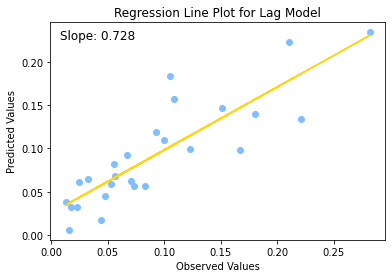

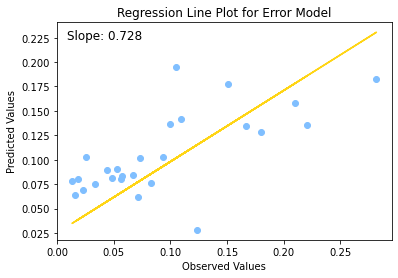

In [40]:
# Scatter Plot of Predicted vs Observed for Lag Model
y_pred = lag.predy
y_pred = y_pred.flatten()
plt.scatter(y, y_pred, color='#80bfff')
z = np.polyfit(y, y_pred, 1)
p = np.poly1d(z)
plt.plot(y, p(y), color='#ffd514')
slope = round(z[0], 3)
plt.text(0.03, 0.97, f"Slope: {slope}", transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Regression Line Plot for Lag Model')
plt.show()

# Scatter Plot of Predicted vs Observed for Error Model
y_pred1 = err.predy
y_pred1= y_pred1.flatten()
plt.scatter(y, y_pred1, color='#80bfff')
z1 = np.polyfit(y, y_pred1, 1)
p1 = np.poly1d(z)
plt.plot(y, p1(y), color='#ffd514')
slope1 = round(z[0], 3)
plt.text(0.03, 0.97, f"Slope: {slope1}", transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Regression Line Plot for Error Model')
plt.show()


In [41]:
spark.stop()